In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.stats import mannwhitneyu
from src.config import DADOS_ORIGINAIS, DADOS_TRATADOS
from src.models import RANDOM_STATE

sns.set_theme(palette="bright")

In [3]:
df = pd.read_csv(DADOS_ORIGINAIS, compression="zip")

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
with pd.option_context("display.max_columns", None, "display.float_format", "{:.2f}".format):
    display(df.describe())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


In [7]:
df[df == 0].count()

Time           2
V1             0
V2             0
V3             0
V4             0
V5             0
V6             0
V7             0
V8             0
V9             0
V10            0
V11            0
V12            0
V13            0
V14            0
V15            0
V16            0
V17            0
V18            0
V19            0
V20            0
V21            0
V22            0
V23            0
V24            0
V25            0
V26            0
V27            0
V28            0
Amount      1825
Class     284315
dtype: int64

In [8]:
df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [9]:
df["Class"].value_counts(normalize=True)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64

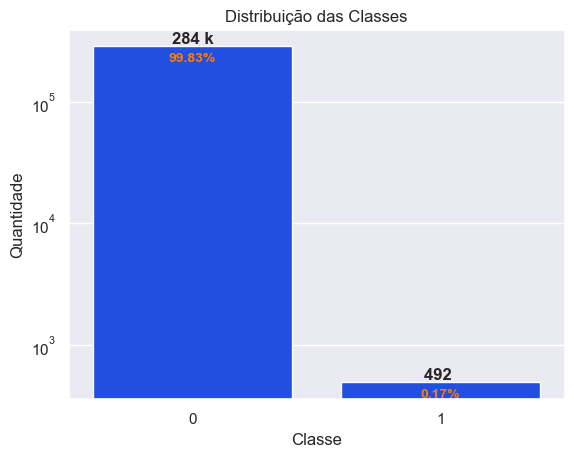

In [10]:
fig, ax = plt.subplots()

sns.countplot(data=df, x="Class", ax=ax)

eng_fmt = EngFormatter(places=0)
ax.yaxis.set_major_formatter(eng_fmt)

ax.set_yscale("log")

ax.bar_label(
    ax.containers[0],
    label_type="edge",
    weight="bold",
    labels=map(eng_fmt.format_eng,df["Class"].value_counts()),
)

ax.bar_label(
    ax.containers[0],
    label_type="edge",
    weight="bold",
    labels=map(lambda num: f"{num:.2%}",df["Class"].value_counts(normalize=True)),
    padding=-13,
    fontsize=10,
    color="C1",
)

ax.set_title("Distribuição das Classes")
ax.set_xlabel("Classe")
ax.set_ylabel("Quantidade")

plt.show()

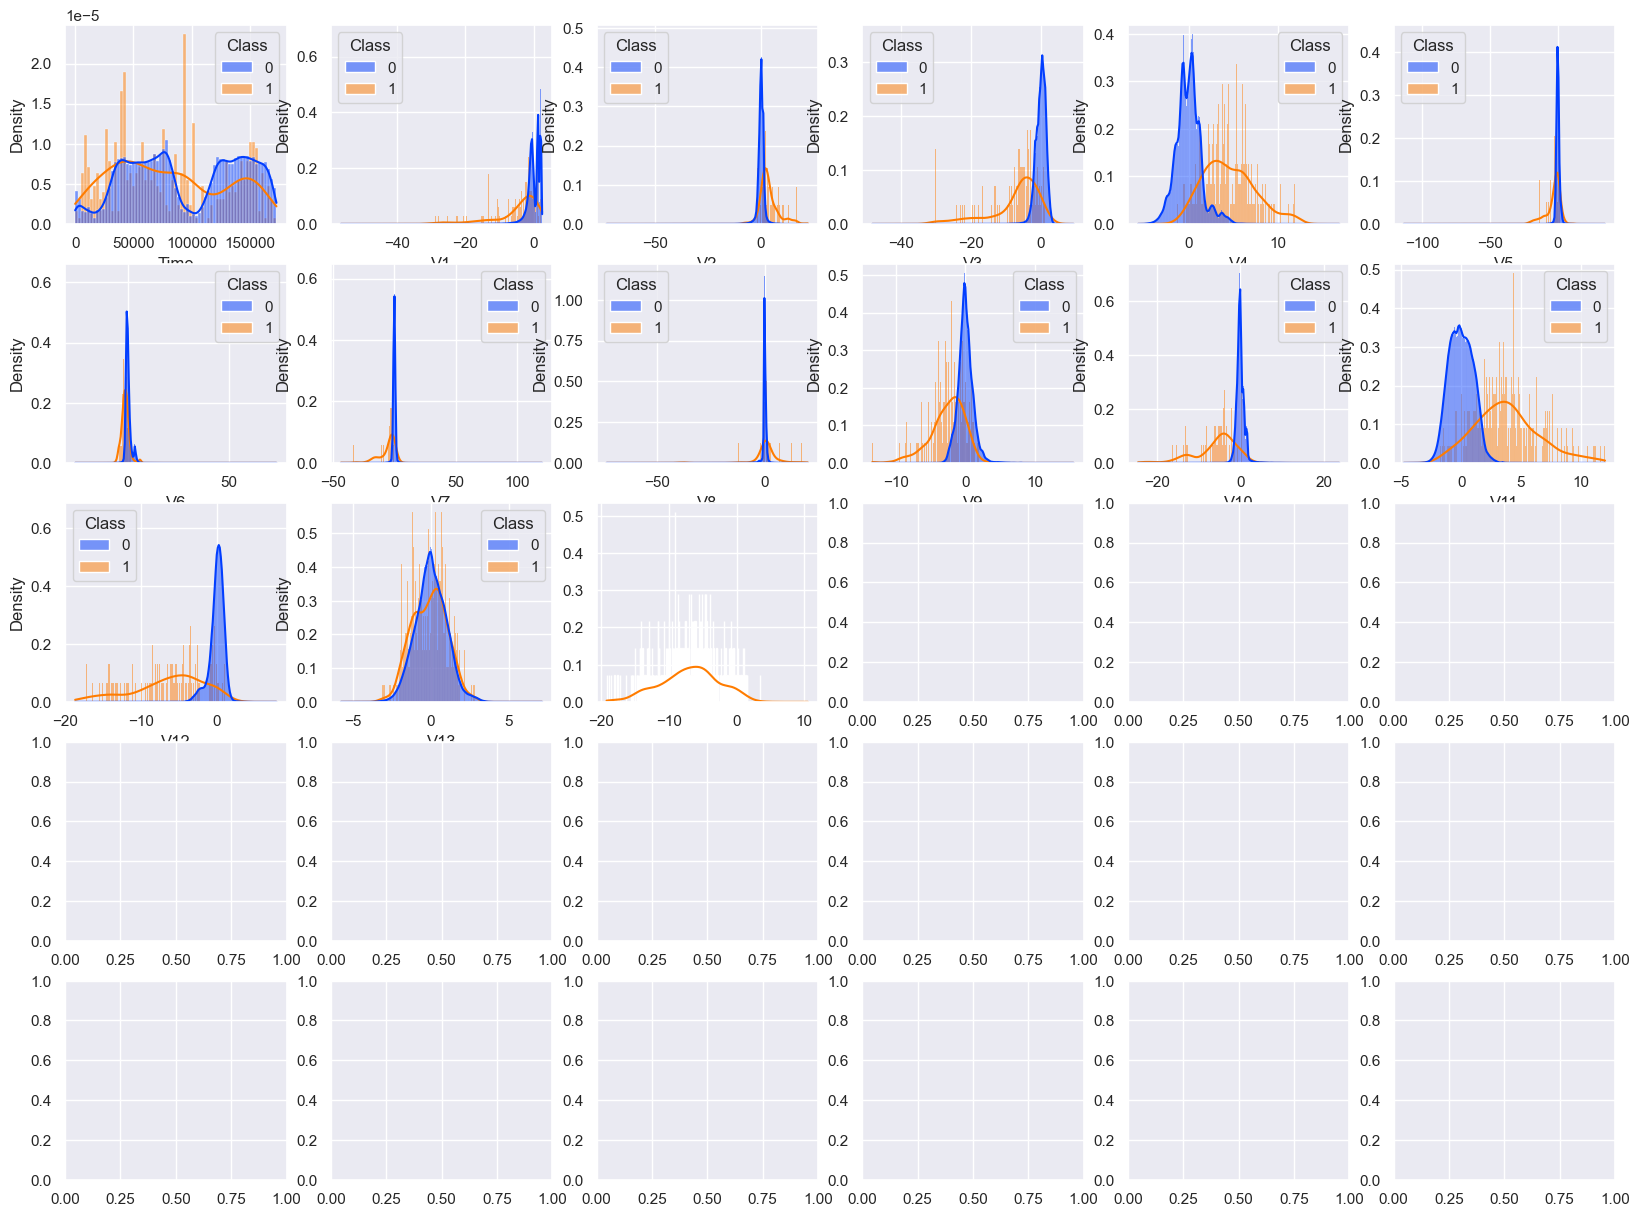

In [12]:
# demora a rodar
fig, axs = plt.subplots(5, 6,figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.histplot(data=df, x=coluna, ax=ax, kde=True, hue="Class", stat="density", common_norm=False)

plt.tight_layout()
plt.show()

In [14]:
df_sample = df.groupby("Class").sample(n=400, random_state=RANDOM_STATE)

df_sample.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0.76,0
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,4.18,0
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,15.00,0
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,57.00,0
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0.00,0


In [15]:
df_sample["Class"].value_counts()

Class
0    400
1    400
Name: count, dtype: int64

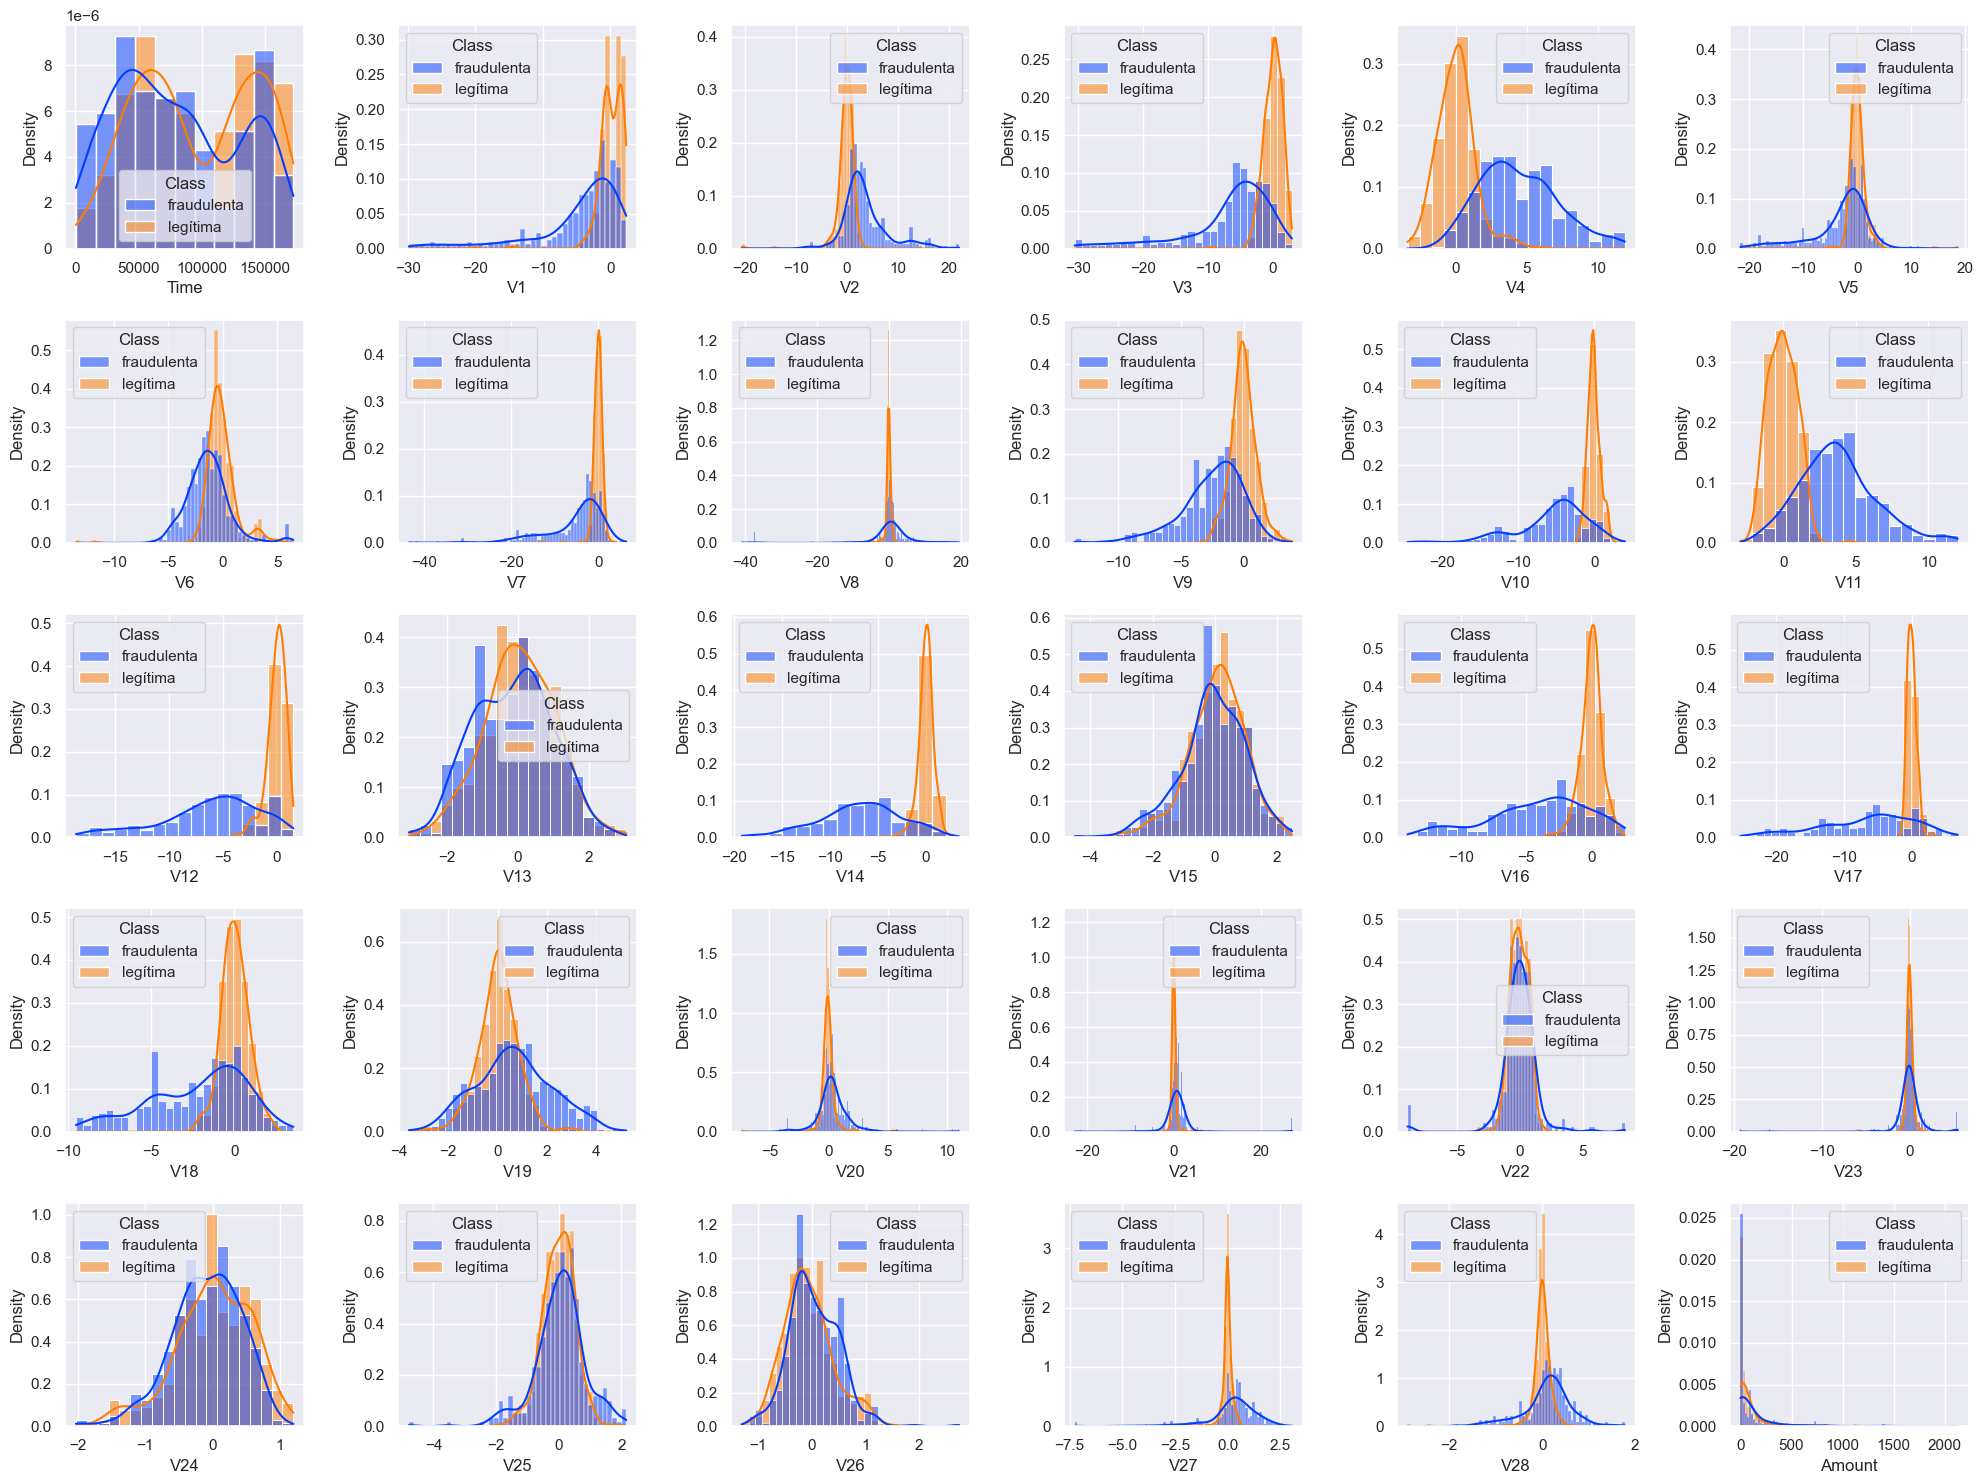

In [50]:
fig, axs = plt.subplots(5, 6,figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df_sample.columns):
    sns.histplot(data=df_sample, x=coluna, ax=ax, kde=True, hue="Class", stat="density", common_norm=False)

plt.tight_layout()
plt.show()

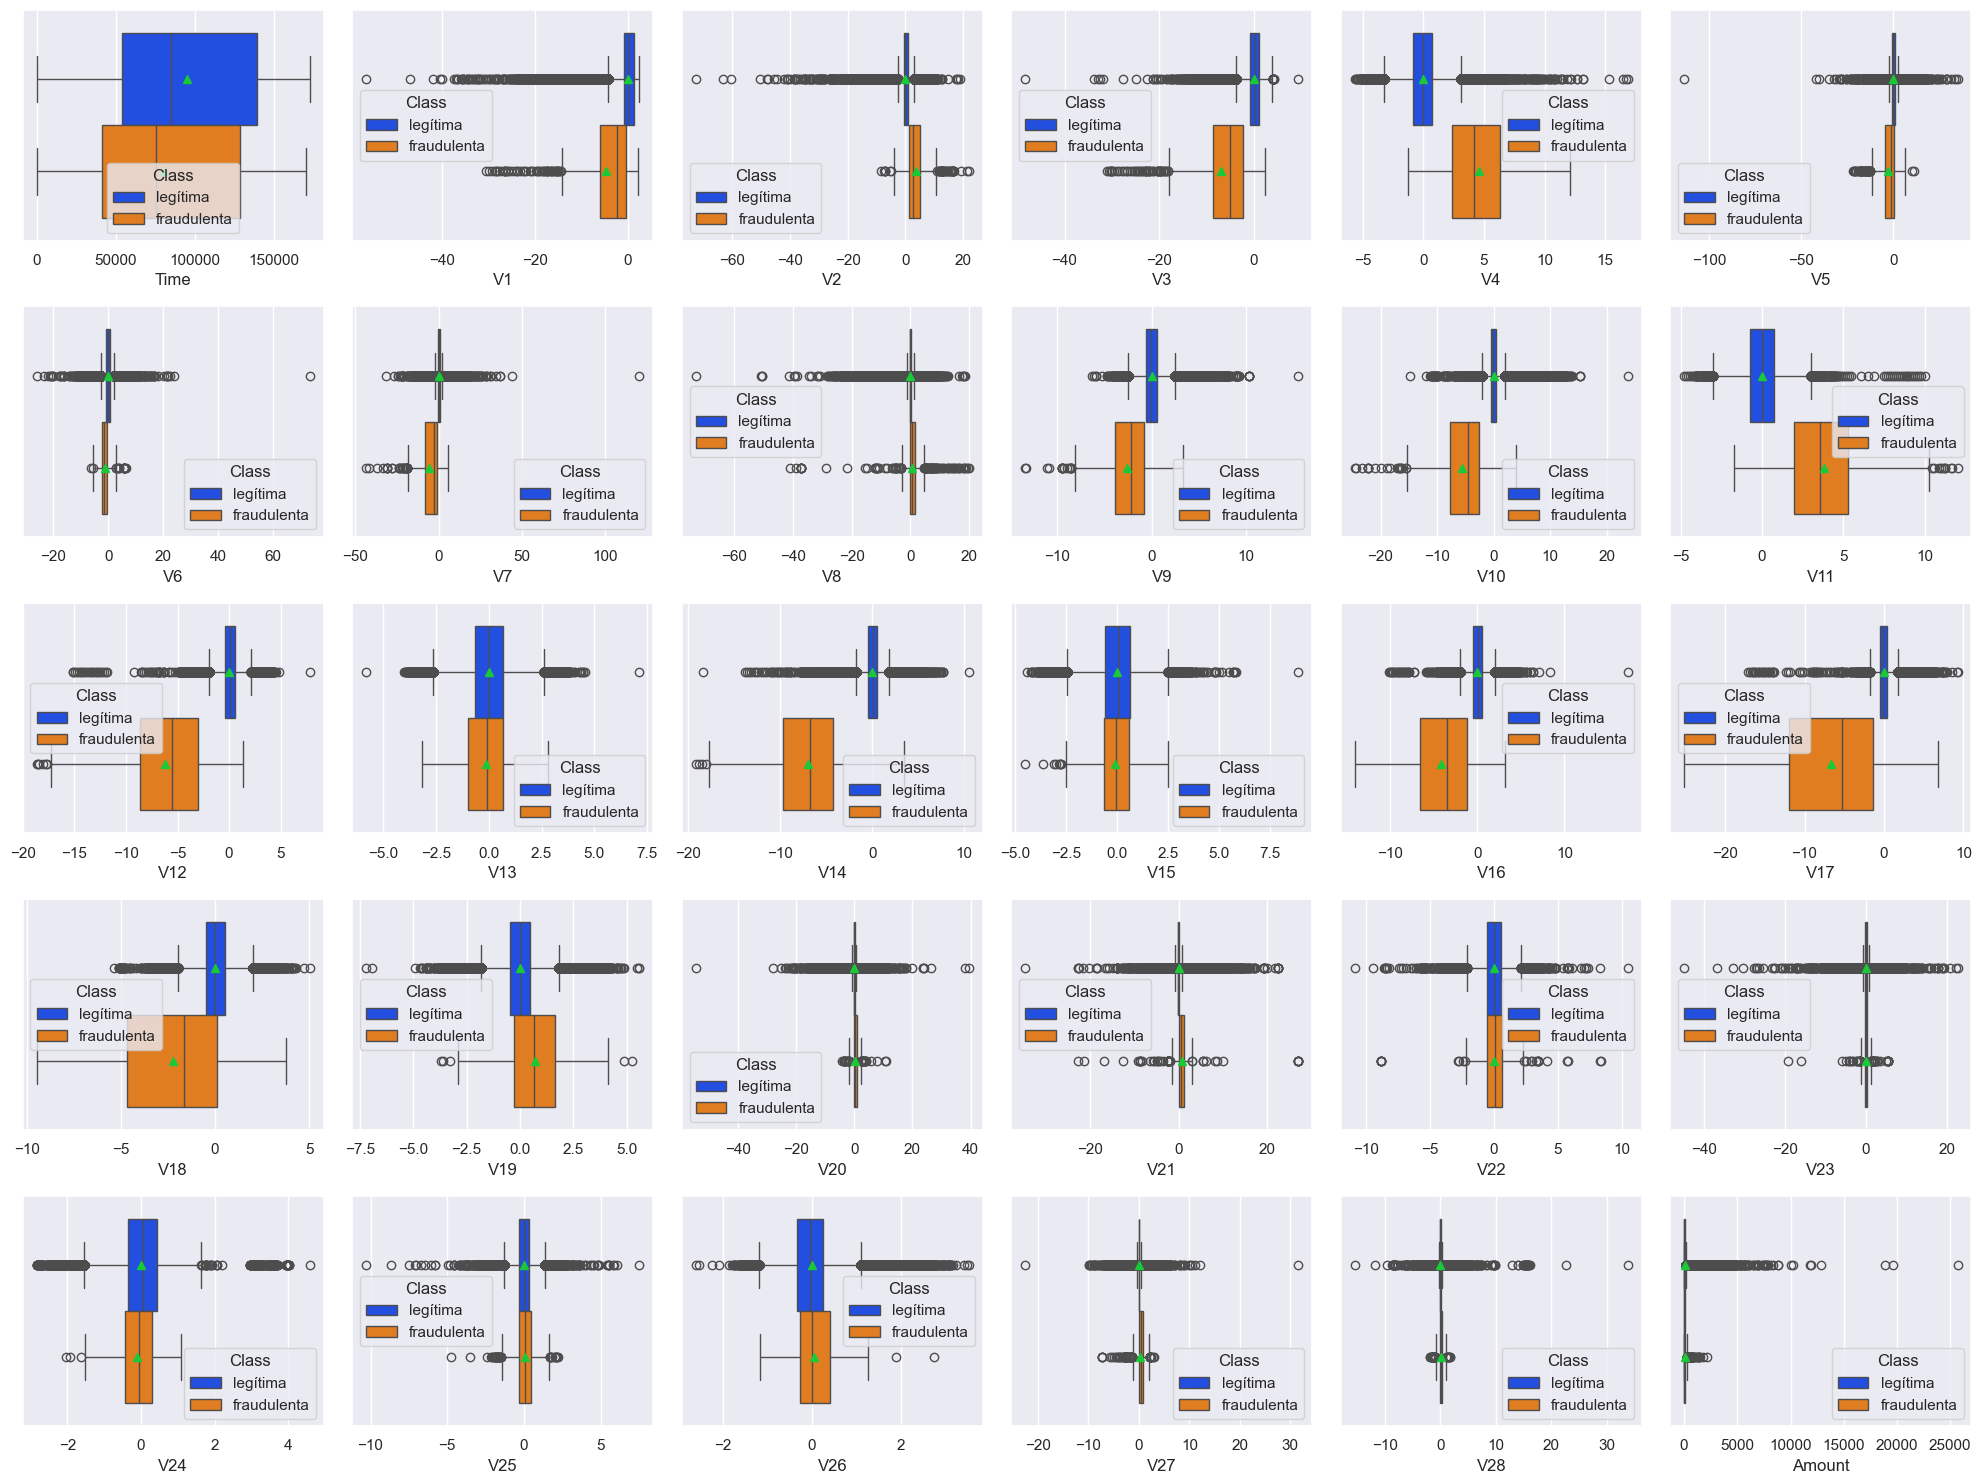

In [49]:
fig, axs = plt.subplots(5, 6,figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(data=df, x=coluna, ax=ax, showmeans=True, hue="Class")

plt.tight_layout()
plt.show()

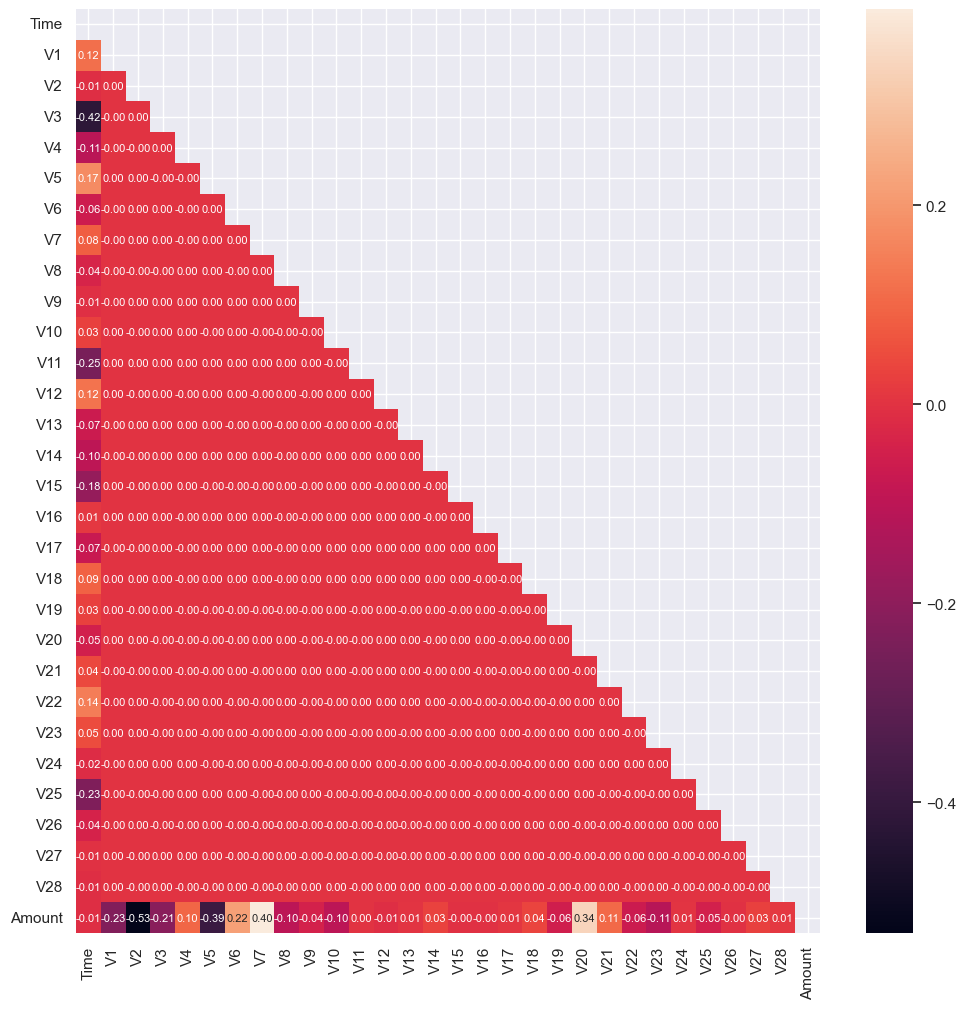

In [53]:
corr = df.select_dtypes("number").corr()

matriz = np.triu(corr)

fig, ax = plt.subplots(figsize=(12, 12))

sns.heatmap(
    corr,
    mask=matriz,
    annot=True,
    fmt=".2f",
    ax=ax,
    annot_kws={"fontsize":8}
)

plt.show()

In [66]:
features = df.columns.drop("Class").to_list()

coluna_target = "Class"

analise_mw = {}

classes = df[coluna_target].unique()

alfa = 0.01

agrupamento = df.groupby(coluna_target)

In [67]:
for coluna in features:
    grupo1 = agrupamento.get_group(classes[0])[coluna]
    grupo2 = agrupamento.get_group(classes[1])[coluna]
    
    estatistica_mw, pvalue_mw = mannwhitneyu(grupo1, grupo2)

    analise_mw[coluna] = {
        "pvalue": pvalue_mw,
        "estatistica": estatistica_mw,
        "relacao_significativa": pvalue_mw < alfa
    }

df_mw = pd.DataFrame(analise_mw).T

df_mw

,pvalue,estatistica,relacao_significativa
Time,0.0,81310602.0,True
V1,0.0,111193870.0,True
V2,0.0,20289296.0,True
V3,0.0,127583455.0,True
V4,0.0,8636598.0,True
V5,0.0,99256726.0,True
V6,0.0,107291012.0,True
V7,0.0,116915822.0,True
V8,0.0,47862020.0,True
V9,0.0,118073844.0,True


In [68]:
df_mw.query("relacao_significativa == False")

,pvalue,estatistica,relacao_significativa
V13,0.051215,73493959.0,False
V15,0.129508,72703847.0,False
V22,0.266395,67916421.0,False
V25,0.012463,65388547.0,False


In [83]:
df_majoritaria = df[df["Class"] == 0]
df_minoritaria = df[df["Class"] == 1]

df_majoritaria.shape, df_minoritaria.shape

((284315, 31), (492, 31))

In [81]:
def remover_outliers_quantil(df, variaveis, quantil_inferior=0.05, quantil_superior=0.95):
    df_filtrado = df.copy()
    for variavel in variaveis:
        limite_inferior = df[variavel].quantile(quantil_inferior)
        limite_superior = df[variavel].quantile(quantil_superior)
        df_filtrado = df[(df[variavel] >= limite_inferior) & (df[variavel] <= limite_superior)]
        return df_filtrado

In [82]:
variaveis = df.columns.drop("Class")

df_majoritaria_filtrado = remover_outliers_quantil(df_majoritaria, variaveis)

df_majoritaria_filtrado.shape

(255883, 31)

In [84]:
df_sem_outliers = pd.concat([df_majoritaria_filtrado, df_minoritaria])

df_sem_outliers.shape

(256375, 31)

In [89]:
df_sem_outliers = df_sem_outliers.reset_index(drop=True)

df_sem_outliers.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,25344.0,-0.995183,-0.039833,1.587280,-1.889184,0.086393,0.110665,0.371166,-0.181099,-1.065219,...,0.053965,0.337669,-0.090478,-0.286068,0.045066,-0.476159,-0.405522,-0.155737,32.92,0
1,25344.0,-1.189360,1.156971,1.368210,-0.232449,-0.034136,-0.324731,0.401403,0.241093,-0.067642,...,-0.209365,-0.440758,0.141775,0.171039,-0.239685,0.075594,0.366013,0.232066,0.89,0
2,25345.0,-1.603479,-0.275395,3.446021,3.525447,-0.959825,1.328505,-0.355322,0.293210,0.672573,...,-0.000287,0.835540,-0.204721,0.486938,0.324799,0.533273,0.421326,0.073160,185.09,0
3,25348.0,1.096714,-1.049339,-0.073346,-1.001950,0.084768,1.947188,-0.926699,0.628543,-0.716949,...,0.123027,0.304479,-0.038933,-1.871220,0.201114,-0.142292,0.059422,-0.007457,79.71,0
4,25349.0,1.262724,0.292562,0.523730,0.614042,-0.429046,-0.978012,0.097620,-0.236076,-0.037052,...,-0.252002,-0.700102,0.130210,0.389602,0.236785,0.093132,-0.025331,0.019989,0.89,0


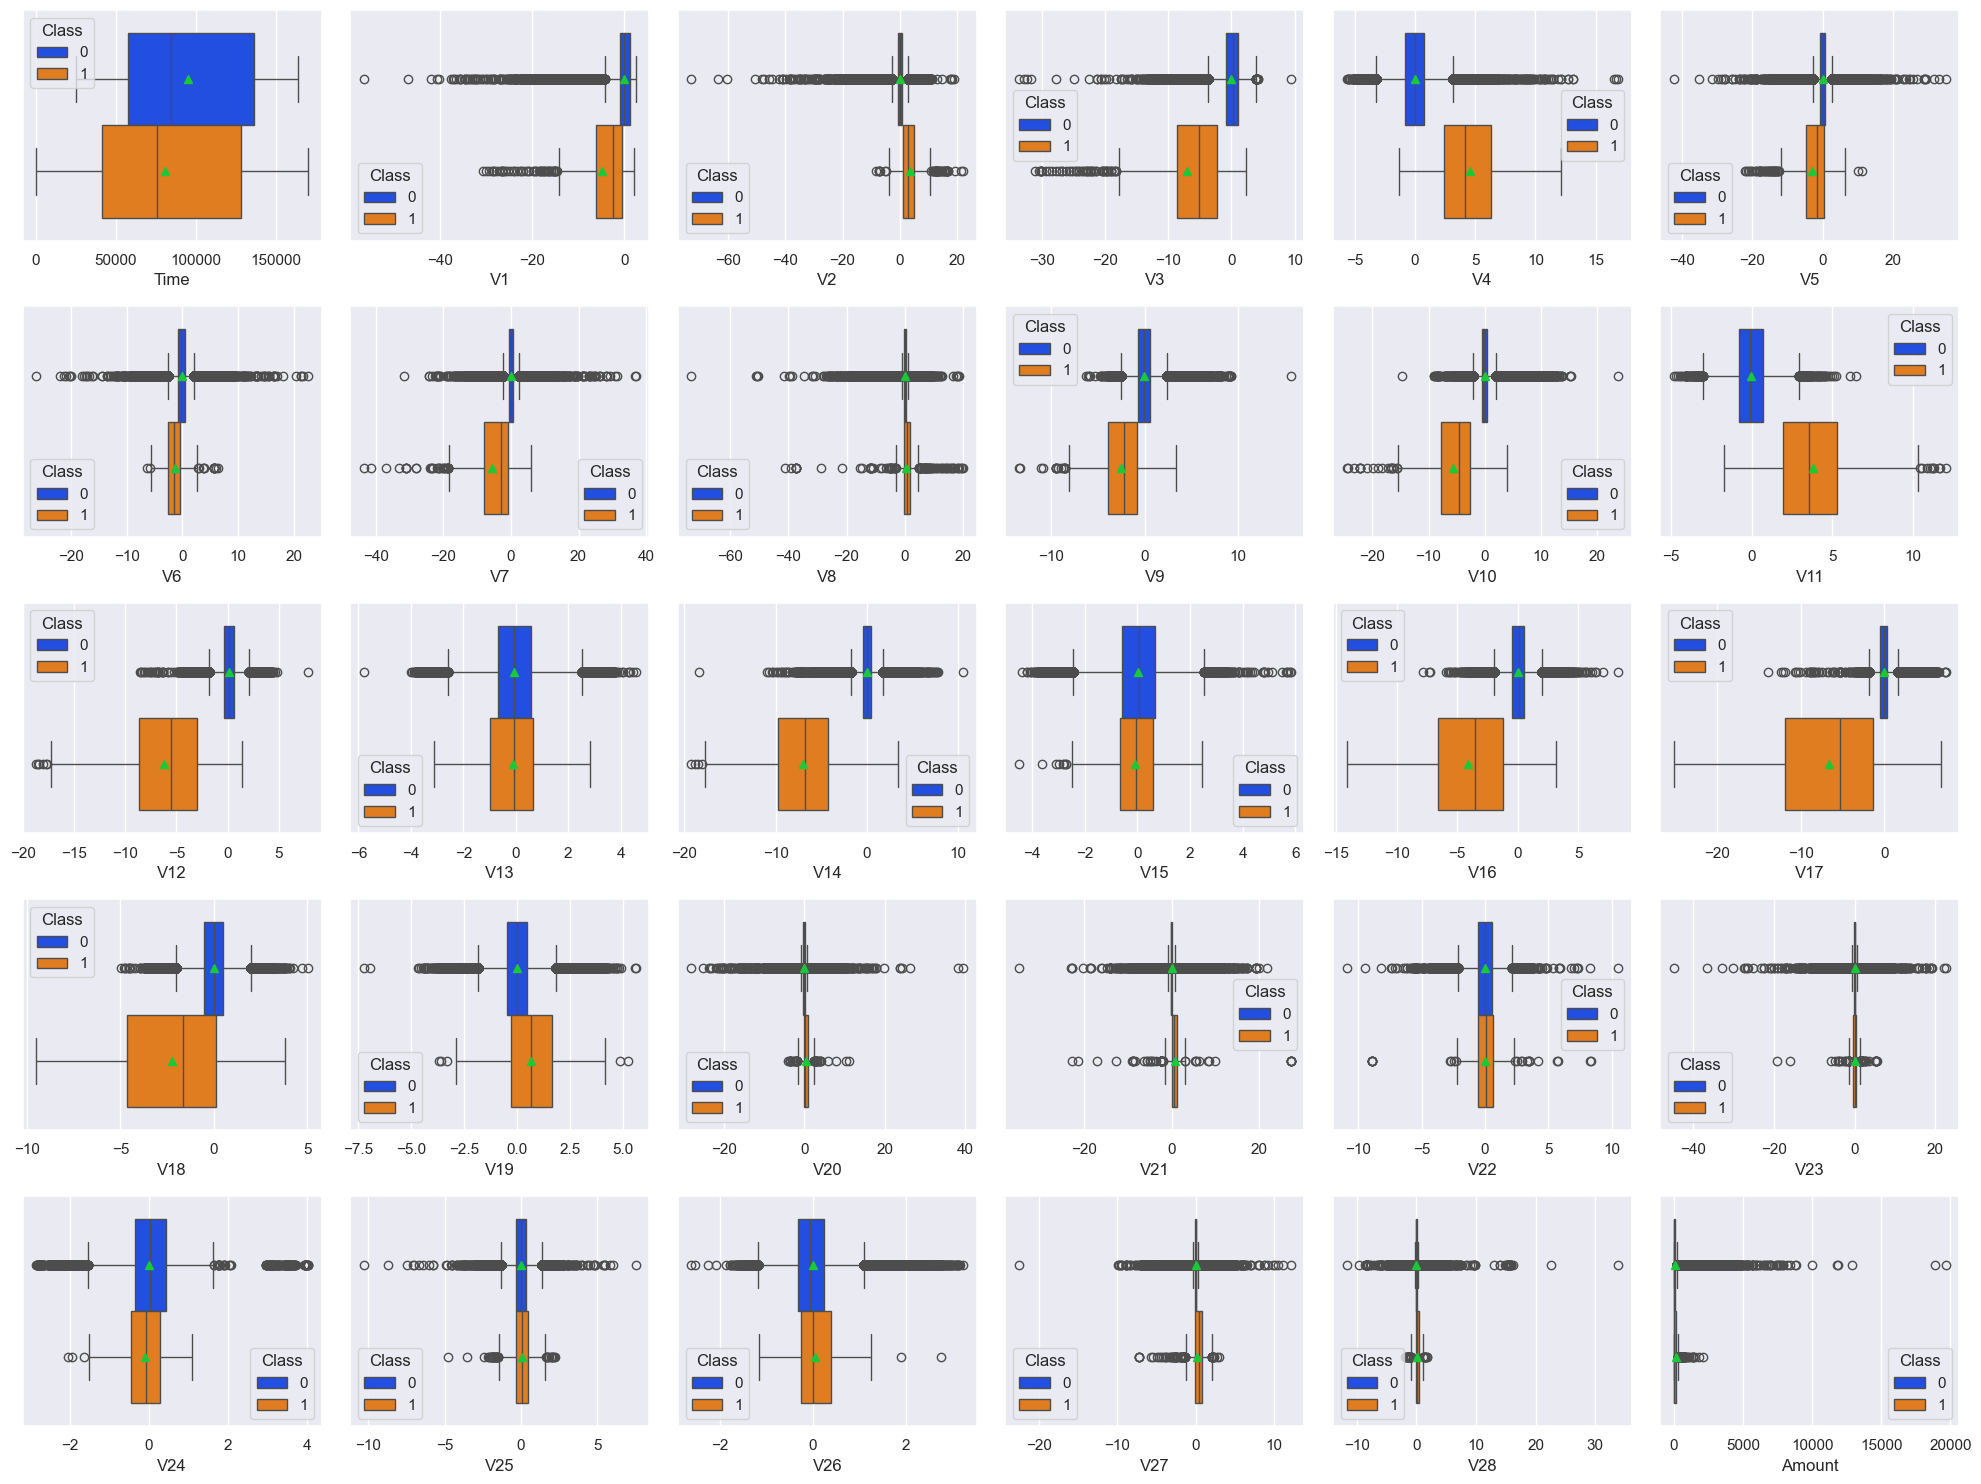

In [90]:
fig, axs = plt.subplots(5, 6,figsize=(20, 15))

for ax, coluna in zip(axs.flatten(), df.columns):
    sns.boxplot(data=df_sem_outliers, x=coluna, ax=ax, showmeans=True, hue="Class")

plt.tight_layout()
plt.show()

In [91]:
df_sem_outliers = df_sem_outliers.drop(
    columns=df_mw.query("relacao_significativa == False").index
)

df_sem_outliers.shape

(256375, 27)

In [92]:
df_sem_outliers.to_parquet(DADOS_TRATADOS, index=False)